In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import glob
import os
import pandas as pd

from tqdm import tqdm
import seaborn as sns

In [19]:
df = pd.read_csv('../../Grabaciones curadas/data_catalog.csv')
df = df.query("rana_label == 'BOAFAB' and quality_label != 'F'")

In [29]:
df.sort_values('length')

init         end      length rana_label quality_label     label  \
2636   59.206444   59.283708    0.077264     BOAFAB             C  BOAFAB_C   
2544  319.886283  319.971621    0.085338     BOAFAB             M  BOAFAB_M   
2399  368.027157  368.113954    0.086797     BOAFAB             M  BOAFAB_M   
2333   50.551319   50.640851    0.089532     BOAFAB             C  BOAFAB_C   
2329   39.941783   40.031315    0.089532     BOAFAB             C  BOAFAB_C   
...          ...         ...         ...        ...           ...       ...   
3473    0.510461  140.998336  140.487875     BOAFAB             C  BOAFAB_C   
3957   39.167827  183.152026  143.984199     BOAFAB             M  BOAFAB_M   
2568  607.245986  787.294231  180.048245     BOAFAB             M  BOAFAB_M   
2503    1.536069  196.131014  194.594945     BOAFAB             M  BOAFAB_M   
3806    1.838597  268.413411  266.574814     BOAFAB             C  BOAFAB_C   

                                                   file  is_def  \
2636  FNJV_0032140_Boana_faber_Rio de Janeiro_RJ_Ber...    True   
2544  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...    True   
2399  FNJV_0032314_Boana_faber_Sao Luis do Paraiting...    True   
2333  FNJV_0032464_Boana_faber_Feira de Santana_BA_L...    True   
2329  FNJV_0032464_Boana_faber_Feira de Santana_BA_L...    True   
...                                                 ...     ...   
3473  FNJV_0030854_Boana_faber_Itabuna_BA_Jacques Vi...    True   
3957  FNJV_0010324_Boana_faber_Anhembi_SP_Jose Carlo...    True   
2568  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...    True   
2503  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...    True   
3806  FNJV_0011769_Boana_faber_Cabreuva_SP_Gilda Vas...    True   

                                               file_wav  
2636  FNJV_0032140_Boana_faber_Rio de Janeiro_RJ_Ber...  
2544  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...  
2399  FNJV_0032314_Boana_faber_Sao Luis do Paraiting...  
2333  FNJV_0032464_Boana_faber_Feira de Santana_BA_L...  
2329  FNJV_0032464_Boana_faber_Feira de Santana_BA_L...  
...                                                 ...  
3473  FNJV_0030854_Boana_faber_Itabuna_BA_Jacques Vi...  
3957  FNJV_0010324_Boana_faber_Anhembi_SP_Jose Carlo...  
2568  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...  
2503  FNJV_0032290_Boana_faber_Boraceia_SP_Lucas Rod...  
3806  FNJV_0011769_Boana_faber_Cabreuva_SP_Gilda Vas...  

[428 rows x 9 columns]

In [58]:
df.length.sum()

4664.910709999999

In [59]:
df.loc[df.length <= 1]

init        end    length rana_label quality_label     label  \
1485   8.017076   8.160908  0.143832     BOAFAB             C  BOAFAB_C   
1486  13.398272  13.554612  0.156340     BOAFAB             C  BOAFAB_C   
1487  17.550642  17.719489  0.168847     BOAFAB             C  BOAFAB_C   
1488  20.639906  20.777484  0.137578     BOAFAB             C  BOAFAB_C   
1489  23.607224  23.744803  0.137579     BOAFAB             C  BOAFAB_C   
...         ...        ...       ...        ...           ...       ...   
3942   6.501965   6.604305  0.102340     BOAFAB             C  BOAFAB_C   
3943   8.171235   8.275849  0.104614     BOAFAB             C  BOAFAB_C   
3944   9.849602   9.951941  0.102339     BOAFAB             C  BOAFAB_C   
3945  11.248241  11.350580  0.102339     BOAFAB             C  BOAFAB_C   
3947  17.327203  17.434091  0.106888     BOAFAB             C  BOAFAB_C   

                                                   file  is_def  \
1485  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...    True   
1486  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...    True   
1487  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...    True   
1488  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...    True   
1489  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...    True   
...                                                 ...     ...   
3942  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....    True   
3943  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....    True   
3944  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....    True   
3945  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....    True   
3947  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....    True   

                                               file_wav  
1485  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...  
1486  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...  
1487  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...  
1488  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...  
1489  FNJV_0040072_Boana_faber_Dores do Rio Preto_ES...  
...                                                 ...  
3942  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....  
3943  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....  
3944  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....  
3945  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....  
3947  FNJV_0011068_Boana_faber_Campinas_SP_Marcio R....  

[263 rows x 9 columns]

In [60]:
obs = df.loc[2333]
obs

init                                                     50.551319
end                                                      50.640851
length                                                    0.089532
rana_label                                                  BOAFAB
quality_label                                                    C
label                                                     BOAFAB_C
file             FNJV_0032464_Boana_faber_Feira de Santana_BA_L...
is_def                                                        True
file_wav         FNJV_0032464_Boana_faber_Feira de Santana_BA_L...
Name: 2333, dtype: object

In [54]:
wav_path = obs.file_wav
audio, sr = librosa.load(f'../../Grabaciones curadas/Grabaciones curadas/{wav_path}', sr=16000)
print('Audio Real: --------------------')
Audio(data=audio, rate=sr)

Audio Real: --------------------


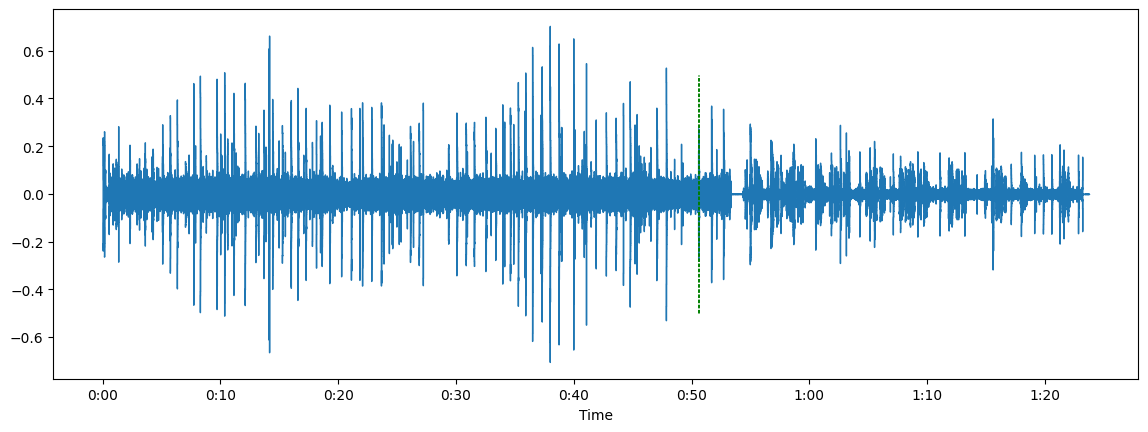

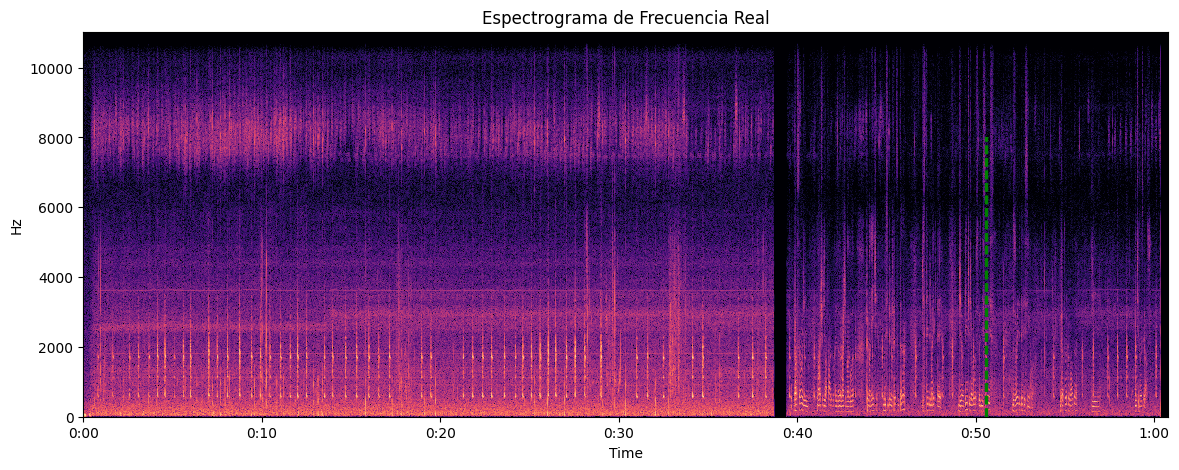

Audio Real: --------------------


In [55]:
# waveform
plt.figure().set_figwidth(14)
max_min = 0.5
plt.vlines(x=obs.init, ymin=-max_min, ymax=max_min, colors='green', linestyles='dashed', linewidth=0.7)
plt.vlines(x=obs.end, ymin=-max_min, ymax=max_min, colors='green', linestyles='dashed', linewidth=0.7)
librosa.display.waveshow(audio, sr=sr)

## Espectograma
D = librosa.stft(audio)
# Convert the complex-valued result to magnitude
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
max_min = 8000
plt.vlines(x=obs.init, ymin=0, ymax=max_min, colors='green', linestyles='dashed', linewidth=1.7)
plt.vlines(x=obs.end, ymin=0, ymax=max_min, colors='green', linestyles='dashed', linewidth=1.7)
# plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frecuencia Real')
plt.show()

print('Audio Real: --------------------')
Audio(data=audio, rate=sr)

Audio cortado: --------------------


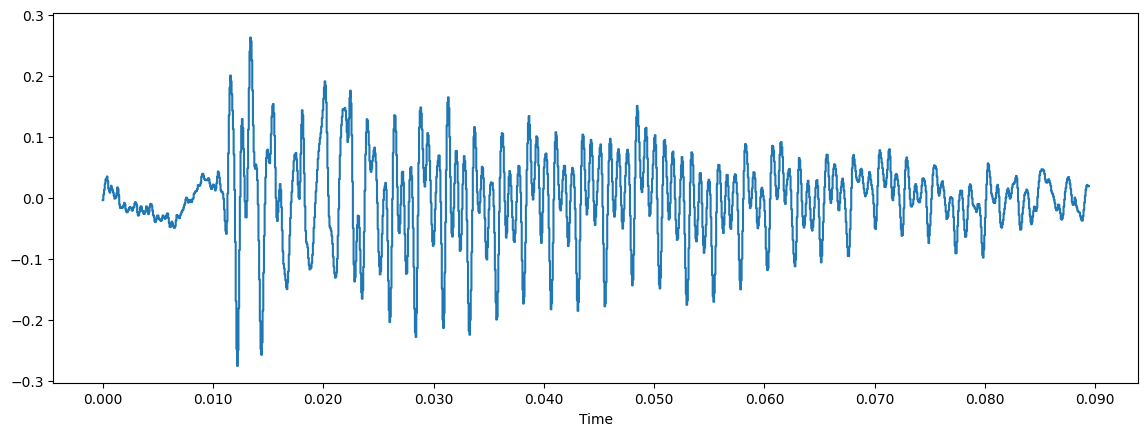

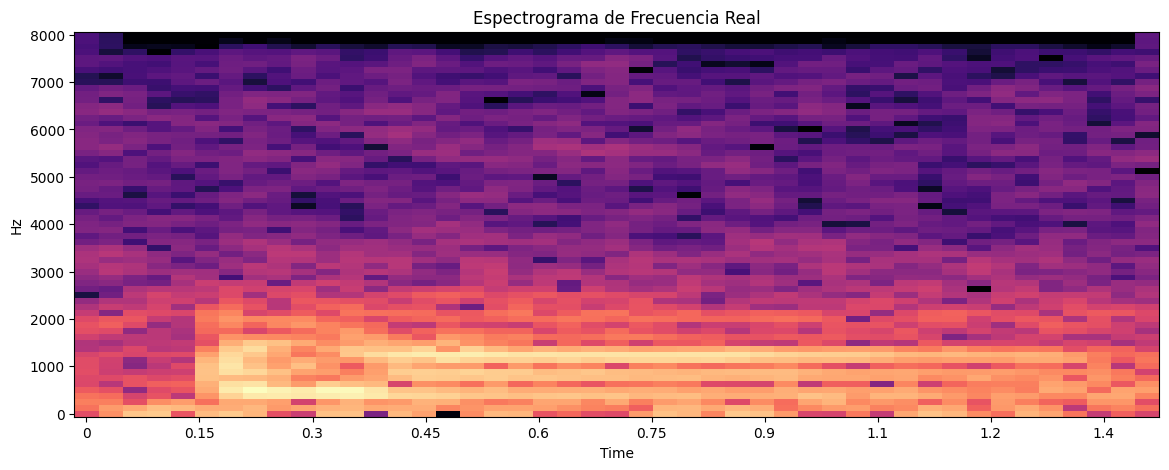

Audio cortado: --------------------


In [56]:
print('Audio cortado: --------------------')
slice_1 = int(obs.init * sr)
slice_2 = int(obs.end * sr)
new_audio = audio[slice_1:slice_2]


# waveform
plt.figure().set_figwidth(14)
librosa.display.waveshow(new_audio, sr=sr)

## Espectograma
D = librosa.stft(new_audio
            ,  n_fft= 1024//2//2//2)
# Convert the complex-valued result to magnitude
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, x_axis="time", y_axis="hz", sr = sr)
# plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de Frecuencia Real')
plt.show()

print('Audio cortado: --------------------')
Audio(data=new_audio, rate=sr)

In [46]:
librosa.display.specshow?

Signature:
librosa.display.specshow(
    data: 'np.ndarray',
    *,
    x_coords: 'Optional[np.ndarray]' = None,
    y_coords: 'Optional[np.ndarray]' = None,
    x_axis: 'Optional[str]' = None,
    y_axis: 'Optional[str]' = None,
    sr: 'float' = 22050,
    hop_length: 'int' = 512,
    n_fft: 'Optional[int]' = None,
    win_length: 'Optional[int]' = None,
    fmin: 'Optional[float]' = None,
    fmax: 'Optional[float]' = None,
    tuning: 'float' = 0.0,
    bins_per_octave: 'int' = 12,
    key: 'str' = 'C:maj',
    Sa: 'Optional[Union[float, int]]' = None,
    mela: 'Optional[Union[str, int]]' = None,
    thaat: 'Optional[str]' = None,
    auto_aspect: 'bool' = True,
    htk: 'bool' = False,
    unicode: 'bool' = True,
    intervals: 'Optional[Union[str, np.ndarray]]' = None,
    unison: 'Optional[str]' = None,
    ax: 'Optional[mplaxes.Axes]' = None,
    **kwargs: 'Any',
) -> 'QuadMesh'
Docstring:
Display a spectrogram/chromagram/cqt/etc.

For a detailed overview of this function, see